# CS224 - Winter 2023 - PROGRAMMING ASSIGNMENT 3 - DNN

**Due**: March 22, 2023 @ 11:59pm PDT

**Maximum points**: 15

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: YASH AGGARWAL
  </br>
  <b>Student ID Number</b>:  862333037
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br> 
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview 
In this assignment you will extract the Deep Convolutional Neural Network features of a dataset(Question 1), implement multinomial logistic regression(Question 2) and ROC curve(Question 3).  

For this assignment we will use the functionality of [PyTorch](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html), [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please ask**. 

Before you start, make sure you have installed all those packages in your local Jupyter instance.


Read **all** cells carefully and answer **all** parts (both text and missing code). You will complete all the code marked `TODO` and answer descriptive/derivation questions.

In [ ]:
%matplotlib inline
import numpy as np
import torch.nn as nn
import torch
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import scipy.io as sio

import matplotlib.pyplot as plt

DO **NOT** MODIFY ANYTHING IF NOT MENTIONED.

# **Question 1: DNN [6 points]**
In this problem, you are required to extract the Deep Convolutional Neural Network (CNN)
features for a dataset. 

The dataset provided is the [**MNIST**](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) dataset.

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



You need to extract features from these images using the [**ResNet-50**](https://pytorch.org/hub/nvidia_deeplearningexamples_resnet50/) architecture available in PyTorch.

You need to fill in the function named `extract`, which loads the images, extracts the features and appends them to the feature list along with the corresponding labels. The output of this code is the file `'mnist_train.mat` and `mnist_test.mat`, which are to be used in the next problem. This file should have

1. `features` of dimension $m\times n$, where $m=60000$ is the number of images and $n=2048$ is the feature dimension obtained using ResNet-50.
1.  `labels` is a vector of length $m$ containing labels from 0 to 9 for the 10 categories.

Some portions of the code is already filled in for convenience. Please do **not** modify anything if not mentioned.



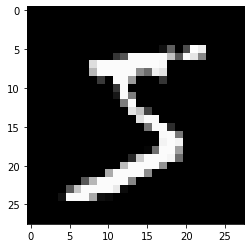

5


In [ ]:
# Print an image
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

for i in range(1):
    plt.imshow (transform_test(mnist_trainset[i][0]).permute(1, 2, 0))
    plt.show()
    print (mnist_trainset[i][1])

In [ ]:
def extract(dataset, filename):
    features = []
    labels = []

    transform_test = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ])

    extractor = models.resnet50(pretrained=True)
    extractor=list(extractor.children())[:-1]
    extractor=nn.Sequential(*extractor)
    for p in extractor.parameters():
        p.requires_grad = False
    
    print (extractor.eval())
    
    with torch.no_grad():
        for (_img, label) in dataset:
            # TODO: fill in to load image, preprocess, and extract features
            # the output variable F expected to be the feature of the image of dimension (2048,)

            
            outputs = extractor(torch.unsqueeze(transform_test(_img),0))
            features.append(outputs.squeeze().numpy())
            labels.append(label)
        
    sio.savemat(filename, mdict={'features': features, 'labels': labels})

Run the code below to get extracted features and labels of MNIST dataset, and then save it to `.mat` file. (This might take a while.) 

You do **not** need to submit the `.mat` file along with the PDF file.

In [ ]:
extract(mnist_trainset, 'mnist_train.mat')
extract(mnist_testset, 'mnist_test.mat')

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


# **Question 2: Multinomial Logistic Regression [6 points]**
In this problem, you will implement the multinomial logistic regression using the extracted features and labels in Question 1. 

You should use variables `trfeature` and `trlabel` for training and `tefeature` and `telabel` for testing. 

Please remember to map the labels properly for testing. You need to fill in the function named `apply_gradient`, which returns the updated parameter $\theta$ after a single pass of gradient descent using the given data points and labels. You also need to fill up certain the portions as mentioned in function `mlr`.


- Using built-in functions like `sklearn.linear_model.LogisticRegression()` will **not** give you any points.
- Please do **not** modify anything if not mentioned.

In [ ]:
def get_one_hot(labels):
    cats = np.unique(labels)
    onehot = np.zeros((labels.size, cats.size))
    onehot[np.arange(labels.size), labels] = 1.
    return onehot

def plot(train, test):
    plt.plot(np.arange(len(train)),  train, 'b-')
    plt.plot(np.arange(len(test)),  test, 'r-')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
    plt.show()

def Softmax(z):
    exp = np.exp(z - np.max(z))
    sftmax = exp / np.sum(exp, axis=1, keepdims=True)
    return sftmax

def CELoss(X, Y, theta): # Cross-entropy loss

    z = X@theta
    L = Softmax(z)[np.arange(len(Y)), np.argmax(Y, axis=1)]
    L = np.log(L)
    L = np.mean(L)
    return -L

# X is a matrix of size n_samples x n_feature
# L is a vector of size n_samples x n_category
# theta is a matrix of size n_feature x n_category
def apply_gradients(X, L, theta, LR):

    m,n = X.shape
    z = X@theta

    grad_for_w = (1/m)*np.dot(X.T,Softmax(z) - L)
    grad_for_b = (1/m)*np.sum(Softmax(z) - L)

    theta = theta - LR * grad_for_w

    return theta

def predict(X, theta, return_proba = False):
    
    z = X@theta
    y_hat = Softmax(z)
    
    if return_proba:
        return y_hat
    else : 
        return np.argmax(y_hat, axis=1)
    
def accuracy (actual, pred):
    return np.sum(np.argmax(actual, axis=1)==pred)/len(actual)

In [ ]:
# TODO: fill in and modify to see change in performance
BATCH_SIZE = 512

# TODO: learning rate; fill in and modify to see change in performance
LR = 0.01
EPOCHS = 100

def mlr(trfeature, tr_onehot, tefeature, te_onehot):


    # add a bias term in x train and x test
    ones = np.ones((trfeature.shape[0],1))
    trfeature = np.hstack((trfeature, ones))
    ones = np.ones((tefeature.shape[0],1))
    tefeature = np.hstack((tefeature, ones))

    # number of training samples
    m_tr = tr_onehot.shape[0]
    n_outs = tr_onehot.shape[1]
    
    m,n = trfeature.shape

    # TODO: initialize
    theta = np.random.random((n,n_outs))


    diff = 1
    epoch = 0

    predonehot = []
    test_accuracy_list = []
    train_accuracy_list = []
    loss_list = []

    while diff > 1e-10 and epoch < EPOCHS:
        theta_old = theta

        # Train
        for i in range(0, m_tr, BATCH_SIZE):
            endpos = min(m_tr, i+BATCH_SIZE-1)
            theta = apply_gradients(trfeature[i:endpos,:], tr_onehot[i:endpos,:], theta, LR)
        

        loss = CELoss(trfeature, tr_onehot, theta)
        loss_list.append(loss)

        diff = np.linalg.norm(theta_old-theta)

        # Train Accuracy
        p = predict(trfeature, theta, return_proba= False)
        
        train_accuracy = accuracy(tr_onehot,predict(trfeature, theta, return_proba= False))
        train_accuracy_list.append(train_accuracy)

        # Test Accuracy
        # TODO: predict on the test dataset
        # fill in to assign the corresponding probabilities to variable predonehot rather than the real one-hot encoding
        # the shape of predonehot is (n_sample,n_ categories); we will need this variable in Question 3
        predonehot = predict(tefeature, theta, return_proba= True)
        test_accuracy = accuracy(te_onehot,predict(tefeature, theta, return_proba= False))
        test_accuracy_list.append(test_accuracy)

        epoch += 1
        # Update learning rate if you want

        if epoch % 10 == 0:
            print ('loss', loss)
            print ('test_accuracy', test_accuracy)
            print ('train_accuracy', train_accuracy)

    plot(train_accuracy_list, test_accuracy_list)

    print('Train Accuracy: %.5f'%(train_accuracy_list[-1]))
    print('Test Accuracy: %.5f'%(test_accuracy_list[-1]))

    return predonehot

Run the code below, check the accuracy plot, and report the test accuracy you obtain.

loss 0.685217674982815
test_accuracy 0.8119
train_accuracy 0.8088833333333333
loss 0.48835627684391403
test_accuracy 0.8607
train_accuracy 0.8569833333333333
loss 0.40378572162425863
test_accuracy 0.8851
train_accuracy 0.8805333333333333
loss 0.3542338573177257
test_accuracy 0.897
train_accuracy 0.8943666666666666
loss 0.3207440341625333
test_accuracy 0.9055
train_accuracy 0.9038666666666667
loss 0.2961233998039243
test_accuracy 0.9102
train_accuracy 0.9106833333333333
loss 0.27699768067773334
test_accuracy 0.9161
train_accuracy 0.9159666666666667
loss 0.261552439432562
test_accuracy 0.9216
train_accuracy 0.91995
loss 0.24871886648112904
test_accuracy 0.9248
train_accuracy 0.9237833333333333
loss 0.23782160077728964
test_accuracy 0.9271
train_accuracy 0.92675


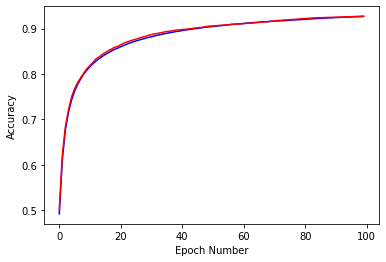

Train Accuracy: 0.92675
Test Accuracy: 0.92710


In [ ]:
# get the extracted features from Question 1
trmat = sio.loadmat('mnist_train.mat')
temat = sio.loadmat('mnist_test.mat')

trfeature, trlabel = trmat['features'], trmat['labels']
tefeature, telabel = temat['features'], temat['labels']


teonehot = get_one_hot(telabel)

# fit multinomial logistic regression
# we will need the variable predonehot for next question
predonehot = mlr(trfeature, get_one_hot(trlabel), tefeature, teonehot)

# **Question 3: ROC [3 points]**
In this problem, you need to implement the Receiver Operating Characteristics (ROC) curve. The output of the function `getROC` should be `TPR`, `FPR` representing True Positive Rate and False Positive Rate respectively.

- Using built-in functions like `sklearn.metrics.roc_curve()` will **not** give you any points.

In [ ]:
# pred is a vector of predictions of size n_samples x 1
# gt is the ground truth vector of 1 or 0 of size n_samples x 1 (1 indicates a positive and 0 negative)
# TPR is the True Positive Rate
# FPR is the False Positive Rate
def getROC(pred, gt):

    FPR, TPR, thresholds = [], [], np.sort(pred)

    for threshold in thresholds:
        y_pred = np.where(pred >= threshold, 1, 0)
        tp = np.sum((y_pred == 1) & (gt == 1))
        fp = np.sum((y_pred == 1) & (gt == 0))
        tn = np.sum((y_pred == 0) & (gt == 0))
        fn = np.sum((y_pred == 0) & (gt == 1))
        TPR.append(tp / (tp + fn))
        FPR.append(fp / (fp + tn))

    # TODO
    return TPR, FPR

Run the code below to plot the ROC you got for the 9-th category.

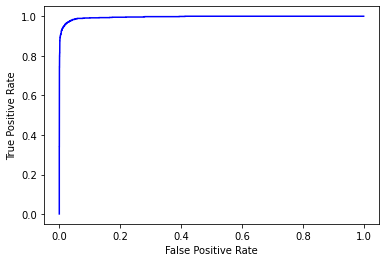

In [ ]:
TPR, FPR = getROC(np.array(predonehot)[:, 9], teonehot[:, 9])
plt.plot(FPR, TPR, 'b-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc -qq
!pip install pypandoc -qq

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2_all.deb ...
Unpacking fonts-lato (2.0-2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.9-2_all.deb ...
Unpacking poppler-data (0.4.9-2) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.13_all.deb ...
Unpacking tex-common (6.13) ...
Selecting previously unselected package fonts-urw-base35.
Preparing to unpack .../04-fonts-urw-base35_20170801.1-3_all.deb ...
Unpacking fonts-urw-base35 (20170801.1-3) ...
Selecting previously unselected package libgs9-common.
Preparin

In [ ]:
!jupyter nbconvert --to PDF "./hw3_DNN_Final.ipynb"

[NbConvertApp] Converting notebook ./hw3_DNN_Final.ipynb to PDF
[NbConvertApp] Support files will be in hw3_DNN_Final_files/
[NbConvertApp] Making directory ./hw3_DNN_Final_files
[NbConvertApp] Making directory ./hw3_DNN_Final_files
[NbConvertApp] Making directory ./hw3_DNN_Final_files
[NbConvertApp] Writing 47773 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 84213 bytes to hw3_DNN_Final.pdf
